# Log-likelihood

Log-likelihood dla m=4.0, sigma=1.5: -2378.575092305648
Log-likelihood dla m=4.0, sigma=2.0: -2205.0571549480746
Log-likelihood dla m=4.0, sigma=2.5: -2214.73098743624
Log-likelihood dla m=5.0, sigma=1.5: -2185.661827615789
Log-likelihood dla m=5.0, sigma=2.0: -2096.5434435600287
Log-likelihood dla m=5.0, sigma=2.5: -2145.2822121478907
Log-likelihood dla m=6.0, sigma=1.5: -2437.193007370375
Log-likelihood dla m=6.0, sigma=2.0: -2238.0297321719836
Log-likelihood dla m=6.0, sigma=2.5: -2235.8334368595415


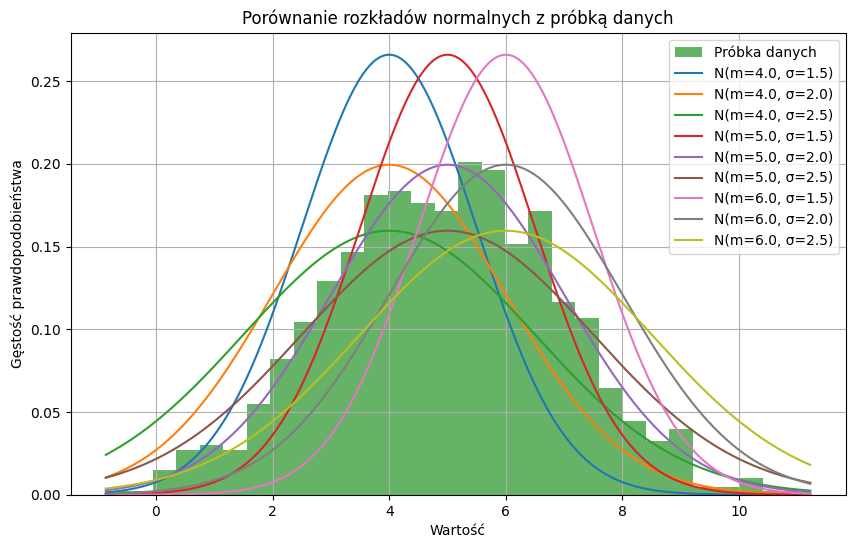

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Parametry rozkładu, z którego losujemy próbkę
m_true = 5.0  # prawdziwa średnia
sigma_true = 2.0  # prawdziwe odchylenie standardowe
n_samples = 1000  # liczba próbek

# Losowanie próbki z rozkładu N(m_true, sigma_true)
samples = np.random.normal(m_true, sigma_true, n_samples)

# Funkcja do obliczania log-likelihood dla różnych parametrów rozkładu normalnego
def log_likelihood(samples, m, sigma):
    return np.sum(norm.logpdf(samples, loc=m, scale=sigma))

# Przykładowe parametry dla innych rozkładów normalnych
m_candidates = [4.0, 5.0, 6.0]
sigma_candidates = [1.5, 2.0, 2.5]

# Obliczanie log-likelihood dla każdej kombinacji parametrów
for m in m_candidates:
    for sigma in sigma_candidates:
        ll = log_likelihood(samples, m, sigma)
        print(f"Log-likelihood dla m={m}, sigma={sigma}: {ll}")

# Wizualizacja
plt.figure(figsize=(10, 6))

# Histogram próbki danych
plt.hist(samples, bins=30, density=True, alpha=0.6, color='g', label='Próbka danych')

# Rysowanie krzywych gęstości dla różnych rozkładów normalnych
x = np.linspace(min(samples), max(samples), 1000)  # Zakres osi X
for m in m_candidates:
    for sigma in sigma_candidates:
        plt.plot(x, norm.pdf(x, loc=m, scale=sigma), label=f'N(m={m}, σ={sigma})')

# Dodanie tytułu i etykiet
plt.title('Porównanie rozkładów normalnych z próbką danych')
plt.xlabel('Wartość')
plt.ylabel('Gęstość prawdopodobieństwa')
plt.legend()
plt.grid(True)
plt.show()

## Rozkład normalny -- maksymalizacja log-likelihood

Mamy próbkę $X$, chcemy znaleźć takie $m$ i $\sigma$ aby zmaksymalizować log-likelihood:
$$
argmax_{m,\sigma} LogLikelihood(X,N(m,\sigma))
$$
Korzystamy z pochodnej.

# Estymacja gęstości (kernelowa)



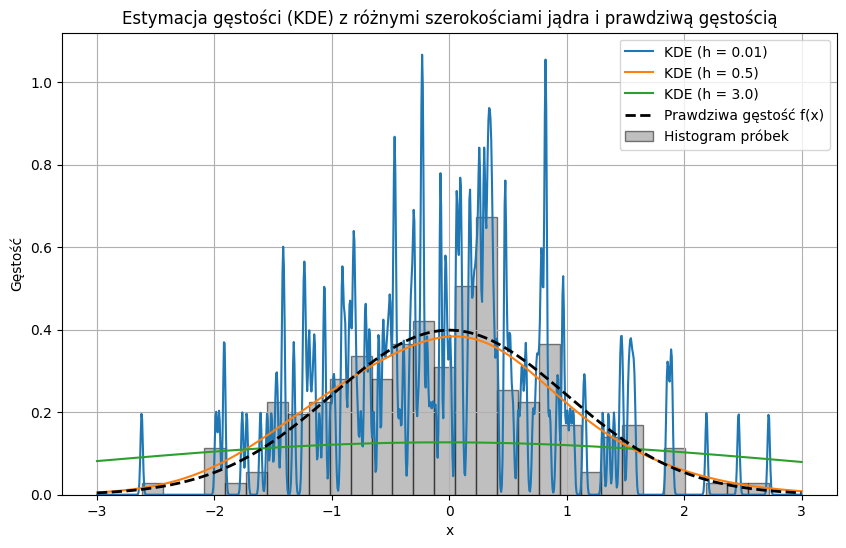

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from scipy.stats import norm

def kde_visualization_with_true_density(sample, bandwidths, true_density, x_range=(-5, 5), num_points=1000):
    """
    Wizualizuje estymację gęstości (KDE) z różnymi szerokościami jądra oraz prawdziwą gęstość.

    Parametry:
    - sample: numpy array, próbka danych
    - bandwidths: lista szerokości jądra (bandwidth)
    - true_density: funkcja prawdziwej gęstości (np. scipy.stats.norm.pdf)
    - x_range: zakres osi x do wykresu
    - num_points: liczba punktów dla gęstości
    """
    # Generujemy wartości osi x
    x = np.linspace(x_range[0], x_range[1], num_points)[:, np.newaxis]

    # Rysowanie KDE dla różnych szerokości
    plt.figure(figsize=(10, 6))
    for bandwidth in bandwidths:
        kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(sample[:, np.newaxis])
        log_density = kde.score_samples(x)
        plt.plot(x, np.exp(log_density), label=f"KDE (h = {bandwidth})")

    # Rysowanie prawdziwej gęstości
    plt.plot(x, true_density(x), 'k--', lw=2, label="Prawdziwa gęstość f(x)")

    # Histogram próbek (znormalizowany)
    plt.hist(sample, bins=30, density=True, alpha=0.5, color="gray", edgecolor="black", label="Histogram próbek")

    # Szczegóły wykresu
    plt.title("Estymacja gęstości (KDE) z różnymi szerokościami jądra i prawdziwą gęstością")
    plt.xlabel("x")
    plt.ylabel("Gęstość")
    plt.legend()
    plt.grid()
    plt.show()

# Przykładowa próbka danych (rozkład normalny z odchyleniem 1)
np.random.seed(42)
mu, sigma = 0, 1  # Parametry rozkładu normalnego
sample = np.random.normal(mu, sigma, 200)

# Lista szerokości jądra do porównania
bandwidths = [0.01, 0.5, 3.0]

# Funkcja prawdziwej gęstości
true_density = lambda x: norm.pdf(x, loc=mu, scale=sigma)

# Wizualizacja KDE z prawdziwą gęstością
kde_visualization_with_true_density(sample, bandwidths, true_density, x_range=(-3, 3))


# Rozkład dwuwymiarowy

# Współczynnik kowariancji i współczynnik korelacji

mamy teraz ciekawszą sytuację jak mamy dwa ciągi danych $(x_i,y_i)$ [albo równoważnie ciąg punktów na płaszczyźnie] i pytamy się czy istnieje między nimi zależność (liniowa). Jak sprawdzić, czy dla ciągów $(x_i)$ oraz $(y_i)$ istnieje? Czyli formalnie, czy istnieje $(A,B) \neq (0,0)$, że $Ax_i-By_i=const$? Zauważmy, że po odjęciu średniej z każdego, dostajemy równoważnie $A(x_i-mean_x)=B(y_i-mean_y)$. Pytanie, jak sprawdzić, że wektory są współliniowe?

Twierdzenie.
$$
|\sum_i x_i y_i| \leq \|x\| \cdot \|y\|
$$
Równość zachodzi wtw. gdy $x$ i $y$ współlinowe.
Nierówność Cauchy'ego: $\langle x,y \rangle \leq \|x\| \cdot \|y\|$. Wiemy, że $\langle x+t y, x+ty \rangle \geq 0$, to znaczy, że $\Delta \leq 0$, ale $\Delta=\langle x,y \rangle^2-\|x\|^2 \|y\|^2$.

A jak byśmy chcieli dopuścić czynnik stały, czyli $Ax_i+By_i=C$?

I teraz możemy rozpatrzeć $x-mean(x)$ i $y-mean(y)$.

Mamy
$$
Cov(X,Y)=\mathbb{E}((X-\mathbb{E}X)(Y-\mathbb{E}Y))=\mathbb{E}(XY)-\mathbb{E}X \cdot \mathbb{E}Y.
$$
Dodatkowo,
$$
Cor(X,Y)=\frac{Cov(X,Y)}{\sigma(X)\sigma(Y)}.
$$


In [1]:
from scipy.stats import pearsonr

# Przykładowe dane
np.random.seed(42)
x = np.linspace(0, 10, 50)
y = 2 * x + np.random.normal(0, 2, size=len(x))  # Silna korelacja dodatnia

# Obliczanie współczynnika korelacji Pearsona
corr, _ = pearsonr(x, y)

# Tworzenie wykresu
plt.scatter(x, y, label=f'Korelacja: {corr:.2f}', color='b')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Współczynnik korelacji')
plt.legend()
plt.grid()
plt.show()

# Punkty losowe wokół okręgu jednostkowego
theta = np.random.uniform(0, 2 * np.pi, 50)
r = np.random.normal(1, 0.1, 50)
x_circle = r * np.cos(theta)
y_circle = r * np.sin(theta)

# Obliczanie korelacji dla punktów wokół okręgu
corr_circle, _ = pearsonr(x_circle, y_circle)

# Tworzenie wykresu
plt.scatter(x_circle, y_circle, label=f'Korelacja: {corr_circle:.2f}', color='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Korelacja punktów wokół okręgu jednostkowego')
plt.legend()
plt.grid()
plt.show()



NameError: name 'np' is not defined

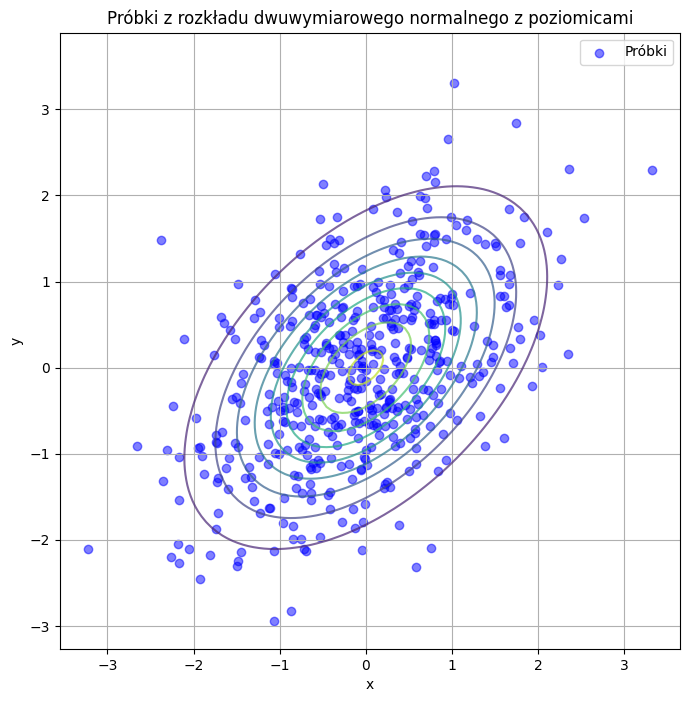

In [ ]:
from scipy.stats import multivariate_normal


def plot_2d_normal_sample_with_contours():
    # Parametry rozkładu dwuwymiarowego normalnego
    mean = [0, 0]  # Średnie dla każdej zmiennej
    cov = [[1, 0.5], [0.5, 1]]  # Macierz kowariancji

    # Generowanie próbek
    samples = multivariate_normal.rvs(mean=mean, cov=cov, size=500)

    # Przygotowanie siatki do rysowania poziomic
    x = np.linspace(-3, 3, 100)
    y = np.linspace(-3, 3, 100)
    X, Y = np.meshgrid(x, y)
    pos = np.dstack((X, Y))
    rv = multivariate_normal(mean, cov)
    Z = rv.pdf(pos)

    # Rysowanie próbek i poziomic
    plt.figure(figsize=(8, 8))
    plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5, color='blue', label='Próbki')
    plt.contour(X, Y, Z, levels=10, alpha=0.7)
    plt.title('Próbki z rozkładu dwuwymiarowego normalnego z poziomicami')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axis('equal')
    plt.legend()
    plt.grid()
    plt.show()

plot_2d_normal_sample_with_contours()


Rozkłady jednostajne na zbiorze ograniczonym $U \subset \mathbb{R}^2$. Losujemy z prostokąta większego, i zwracamy punkty które wpadły do $U$.

***Zadanie.***
Policzu pole koła, losując punkty z kwadratu, i zliczając procent ile punktów wpadło do koła. Wylosuj 100 punktów z rozkładu jednostajnego na kole i zaznacz na płaszczyźnie.

***Zadanie.***
Przybliżone liczenie całki z jakiejś funkcji nieujemnej, na przykład $sin(\sqrt{x})$ w zakresie $x \in [0,1]$
